In [1]:
import platform
# 使用しているOSを表示
platform.platform()

'macOS-10.15.7-x86_64-i386-64bit'

In [2]:
# pythonのversionを表示
!python -V

Python 3.8.11


In [3]:
import pubchempy as pcp
# pcpと略すのが一般的
# pubchemのversionを表示
pcp. __version__

'1.0.4'

In [4]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.1.3'

In [5]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2019.09.3


RDKit WARNING: [13:28:48] Enabling RDKit 2019.09.3 jupyter extensions
[13:28:48] Enabling RDKit 2019.09.3 jupyter extensions


# 1つの分子に対してDescriptorで数字を表示する。

In [6]:
compoud = "quercetine"

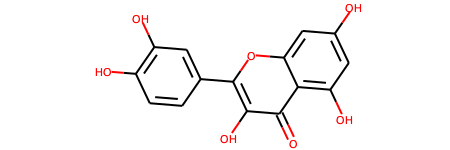

In [7]:
# 今回はpubchemで名前からsmilesに変換してRDKitのmolファイルに変換しています。
pcp_compoud = pcp.get_compounds(compoud, 'name')
compoud_smiles = pcp_compoud[0].isomeric_smiles
mol = Chem.MolFromSmiles(compoud_smiles)
mol 

In [8]:
# Descriptorsに入っているものがList形式になっている。
len(Descriptors.descList)

200

In [9]:
#TPSAの出力
Descriptors.TPSA(mol)

131.36

In [10]:
#HBDの出力
Descriptors.NumHDonors(mol)

5

# 複数分子を読み込んだデータフレームにDescriptorを追加する。

In [11]:
from rdkit.Chem import AllChem, PandasTools

,ID,ROMol
6,354334324,

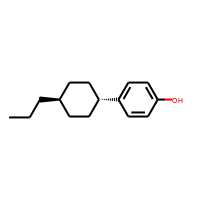

In [12]:
df = PandasTools.LoadSDF('data/PubChem_TCI_phenol_records.sdf')
df = df[['ID','ROMol']]
df.sample(1)

,ID,ROMol,TPSA,MolLogP,qed
88,87564757,,20.23,3.4298,0.676674

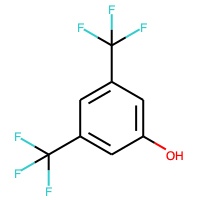

In [13]:
df["TPSA"] = df["ROMol"].map(Descriptors.TPSA)
df["MolLogP"] = df["ROMol"].map(Descriptors.MolLogP)
df["qed"] = df["ROMol"].map(Descriptors.qed)
df.sample(1)

array([[<AxesSubplot:title={'center':'qed'}>]], dtype=object)

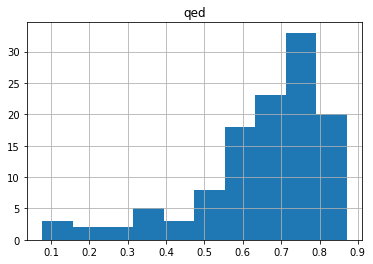

In [14]:
df.hist('qed')

<AxesSubplot:xlabel='MolLogP', ylabel='qed'>

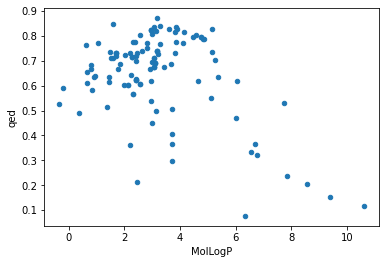

In [15]:
df.plot(kind='scatter', x='MolLogP', y='qed')

## morganfingerprintを表示

In [16]:
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
        
    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(117, 2048)


In [17]:
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_fp['ID'] = df['ID']
df_fp.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,ID
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335558
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335473
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335166
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354334589
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354334487
